<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# 

Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.

## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames()
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
   
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Se detecta que los separadores son ';' ya que al mostrar la informacion no detectaba las columnas ademas de ver una relacion en los numeros de datos con su respectiva base y detectar el un posible numero de muestreos



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. 
Realizar el cambio de valores dependiendo la necesidad como int, datatype etc para una mejor manipuluacion ademas de verificar si los valores ausentes estan de una manera diferente a la que lee pandas

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_orders.head(10))
df_orders.duplicated().sum()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   
5   1843871    20084             5          0                 11   
6   2511640   148233            40          3                  8   
7   2521283    97711             2          0                 18   
8   2266494    34954            40          5                 15   
9    446014    15356             2          4                  8   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
5                    15.0  
6                     2.0  
7                    22.0  

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miércoles_2am = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
total_pedidos = pedidos_miércoles_2am['order_number'].sum()
print(f"El total de pedidos realizados el miércoles a las 2 a.m. es: {total_pedidos}")

El total de pedidos realizados el miércoles a las 2 a.m. es: 2080


¿Qué sugiere este resultado?
es algo ilogico ya que a las 2am no deberia haber tantos pedidos, tal vez se repitieron

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders['order_id'].duplicated().sum()


0

Describe brevemente tus hallazgos y lo que hiciste con ellos
eliminamos el numero de pedidos duplicados en la base de datos


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [14]:
# Revisa únicamente si hay ID de productos duplicados
df_products['product_id'].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'].str.upper()
duplicados_nombres = df_products[df_products['product_name'].duplicated(keep=False)]
print(duplicados_nombres.sort_values(by='product_name'))

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Eliminar las filas con nombres de productos faltantes
df_products_limpio = df_products.dropna(subset=['product_name'])

# Encontrar los nombres de productos duplicados en el DataFrame limpio
duplicados = df_products_limpio[df_products_limpio.duplicated(subset=['product_name'], keep=False)]

# Ordenar el resultado para visualizar los duplicados uno al lado del otro
print(duplicados.sort_values(by='product_name'))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments.info()
df_departments.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


0

In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
df_departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraro operaciones duplicadas

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles.info()
df_aisles.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


0

In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron pasillos repetidos

### `order_products` data frame

In [21]:

# Revisa si hay filas totalmente duplicadas
df_order_products.info()
df_order_products.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
result_product = df_order_products['product_id'].duplicated().sum()
result_order = df_order_products['order_id'].duplicated().sum()
print(result_product)
print(result_order)


4499434
4094961


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Puede que tengamos valores ausentes que no tengan en si una orden clara solo se repite por un error al borra el pedido 


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
#df_products['product_name'].value_counts(dropna=False)
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Se puede observar que pedidos sin noombre

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_ausentes = df_products[df_products['product_name'].isna()]
es_100_en_todos = (productos_ausentes['aisle_id'] == 100).all()
print(es_100_en_todos)

True


Describe brevemente cuáles son tus hallazgos. 
Si tiene una relacion

In [25]:

# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_ausentes = df_products[df_products['product_name'].isna()]
es_21_en_todos = (productos_ausentes['department_id'] == 21).all()
print(es_21_en_todos)


True


Describe brevemente cuáles son tus hallazgos
Tiene una relacion

In [26]:


# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
pasillo_100 = df_aisles[df_aisles['aisle_id'] == 100]
print("Pasillo 100:")
print(pasillo_100)

departamento_21 = df_departments[df_departments['department_id'] == 21]
print("\nDepartamento 21:")
print(departamento_21)

Pasillo 100:
    aisle_id    aisle
99       100  missing

Departamento 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products[df_products['product_name'] == 'Unknown'].head())

     product_id product_name  aisle_id  department_id
37           38      Unknown       100             21
71           72      Unknown       100             21
109         110      Unknown       100             21
296         297      Unknown       100             21
416         417      Unknown       100             21


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
es_solo_primer_pedido = df_orders[df_orders['days_since_prior_order'].isna()]['order_number'].eq(1).all()

print("¿Todos los NaN corresponden al primer pedido?", es_solo_primer_pedido)

¿Todos los NaN corresponden al primer pedido? True


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de revisar los datos y encontrar que no hay ausentes que no sean un primer pedido
</div>


### `order_products` data frame

In [30]:

# Encuentra los valores ausentes
print(df_order_products.isna().sum())


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_val = df_order_products['add_to_cart_order'].min()
max_val = df_order_products['add_to_cart_order'].max()

print("Valor mínimo de add_to_cart_order:", min_val)
print("Valor máximo de add_to_cart_order:", max_val)

Valor mínimo de add_to_cart_order: 1.0
Valor máximo de add_to_cart_order: 64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Extraer las IDs de pedido únicas
order_ids_ausentes = pedidos_ausentes['order_id'].unique()

# Mostrar algunas IDs como ejemplo
print(order_ids_ausentes[:10])
print("Cantidad total de pedidos con valores ausentes:", len(order_ids_ausentes))

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093]
Cantidad total de pedidos con valores ausentes: 70


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Filtrar filas con add_to_cart_order ausente
pedidos_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Agrupar por order_id y contar la cantidad de productos en cada pedido
conteo_productos = pedidos_ausentes.groupby('order_id')['product_id'].count()

# Revisar el valor mínimo
min_productos = conteo_productos.min()

print("Número mínimo de productos en pedidos con add_to_cart_order ausente:", min_productos)

# Comprobar si todos tienen más de 64 productos
todos_mas_64 = min_productos > 64
print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?", todos_mas_64)

Número mínimo de productos en pedidos con add_to_cart_order ausente: 1
¿Todos los pedidos con valores ausentes tienen más de 64 productos? False


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [34]:
# Código del revisor
df_order_products[df_order_products['order_id'].isin(order_ids_ausentes)].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
print(df_order_products['add_to_cart_order'].dtype)
print(df_order_products['add_to_cart_order'].head(10))

int64
0    17
1     1
2     1
3    35
4     5
5     4
6     5
7    10
8    14
9     4
Name: add_to_cart_order, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

De esta manera podimos visualizar los valores que NA los cuales ahora podemos manipular con mayor facilidad 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
#Se verifica que los datos esten en rangos congruentes
print("Rango order_hour_of_day:", df_orders['order_hour_of_day'].min(), "-->", df_orders['order_hour_of_day'].max())
print("Rango order_dow:", df_orders['order_dow'].min(), "-->", df_orders['order_dow'].max())
#

Rango order_hour_of_day: 0 --> 23
Rango order_dow: 0 --> 6


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>

Escribe aquí tus conclusiones
Detectamos que los valores son conguentes

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

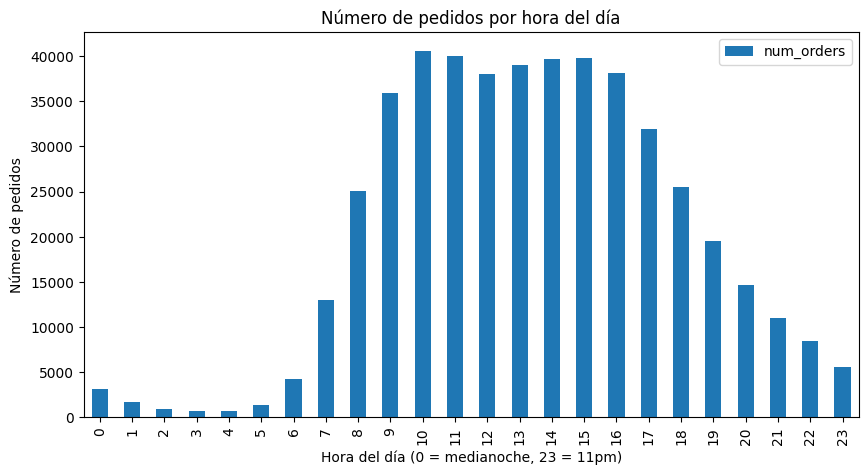

In [37]:
# --- 1. Pedidos por hora del día ---
pedidos_por_hora = df_orders['order_hour_of_day'].value_counts().sort_index().reset_index()
pedidos_por_hora.columns = ['order_hour_of_day', 'num_orders']

pedidos_por_hora.plot(
    x='order_hour_of_day',
    y='num_orders',
    kind='bar',
    title='Número de pedidos por hora del día',
    xlabel='Hora del día (0 = medianoche, 23 = 11pm)',
    ylabel='Número de pedidos',
    figsize=(10,5)
)
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


Podemos observar que en la tarde es cuando mayor numero de pedidos tenemos

### [A3] ¿Qué día de la semana compran víveres las personas?

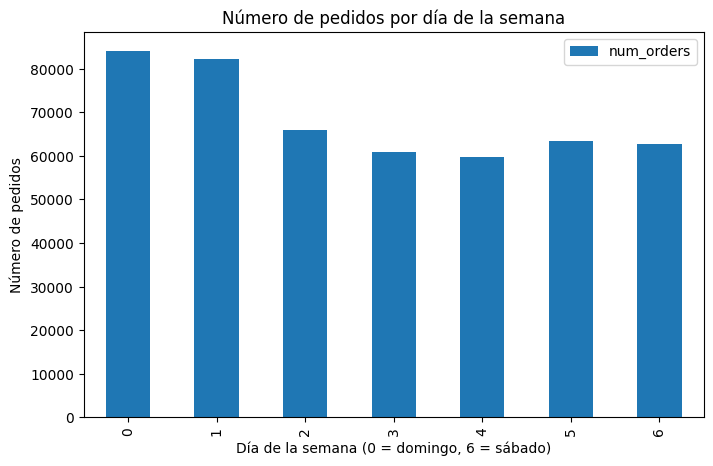

In [38]:
#Pedidos por dia
pedidos_por_dia = df_orders['order_dow'].value_counts().sort_index().reset_index()
pedidos_por_dia.columns = ['order_dow', 'num_orders']

pedidos_por_dia.plot(
    x='order_dow',
    y='num_orders',
    kind='bar',
    title='Número de pedidos por día de la semana',
    xlabel='Día de la semana (0 = domingo, 6 = sábado)',
    ylabel='Número de pedidos',
    figsize=(8,5)
    )
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


Los fines de semana es cuando mas pedidos se realizan


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

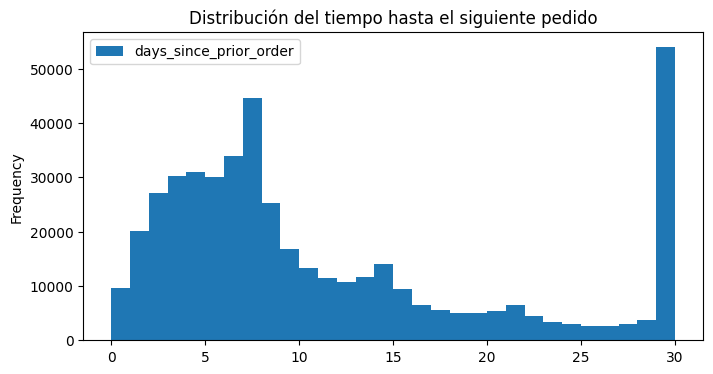

In [39]:
df_orders[['days_since_prior_order']].dropna().plot(
    kind='hist',
    bins=30,
    title='Distribución del tiempo hasta el siguiente pedido',
    xlabel='Días desde el pedido anterior',
    ylabel='Número de pedidos',
    figsize=(8,4)
)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


Hay un pico en 30 por lo que observamos que hay clientes que duran 1 mes sin pedir nada

# [B] Intermedio (deben completarse todos para aprobar)
1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

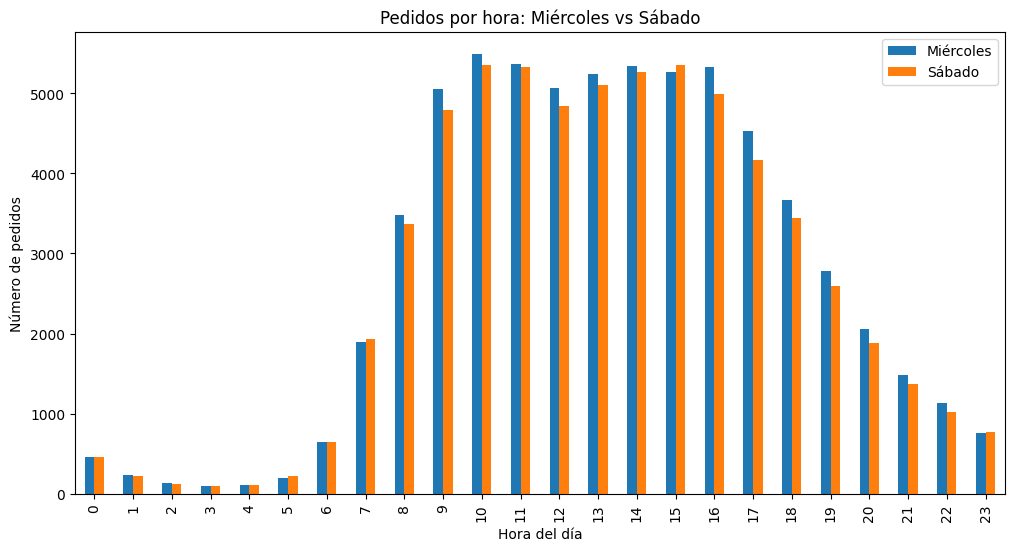

In [40]:

# Contar pedidos por hora
pedidos_miercoles = df_orders[df_orders['order_dow'] == 2]['order_hour_of_day'].value_counts().sort_index().reset_index()
pedidos_miercoles.columns = ['order_hour_of_day', 'num_orders_miercoles']

pedidos_sabado = df_orders[df_orders['order_dow'] == 5]['order_hour_of_day'].value_counts().sort_index().reset_index()
pedidos_sabado.columns = ['order_hour_of_day', 'num_orders_sabado']

# Unir en un solo DataFrame
pedidos_horas = pd.merge(pedidos_miercoles, pedidos_sabado, on='order_hour_of_day', how='outer').fillna(0)
cols = ['num_orders_miercoles', 'num_orders_sabado']

pedidos_horas.plot(
    x='order_hour_of_day',
    y=cols,
    kind='bar',
    title='Pedidos por hora: Miércoles vs Sábado',
    xlabel='Hora del día',
    ylabel='Número de pedidos',
    figsize=(12,6)
)
plt.legend(['Miércoles', 'Sábado'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


se observa mas pedidos los dias miercoles

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [41]:
# Contar cuántos pedidos hizo cada cliente
ordenes_por_cliente = df_orders.groupby('user_id')['order_id'].count().reset_index()
ordenes_por_cliente.columns = ['user_id', 'num_orders']

# Contar cuántos clientes hicieron 1, 2, 3... pedidos
dist_ordenes = ordenes_por_cliente['num_orders'].value_counts().sort_index().reset_index()
dist_ordenes.columns = ['num_orders', 'num_customers']

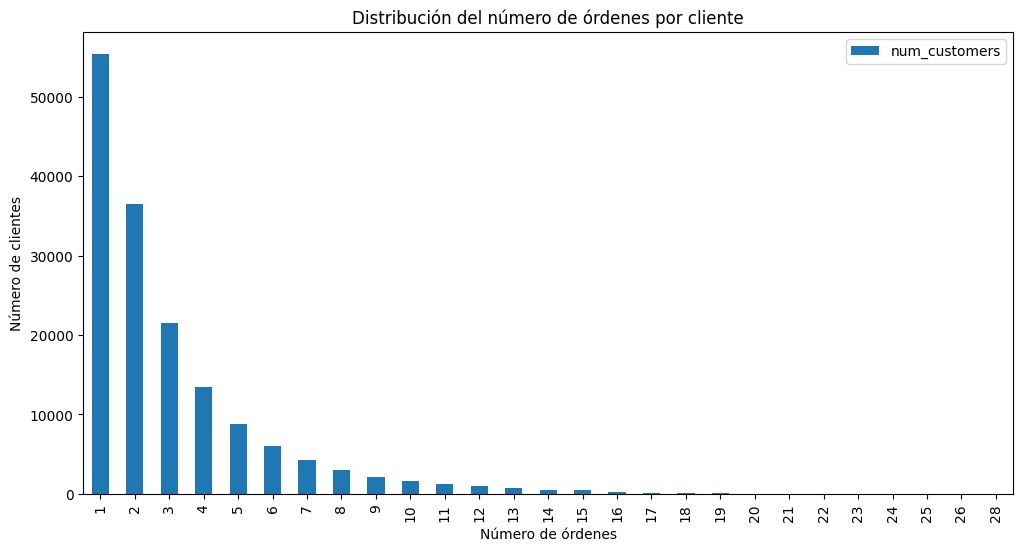

In [42]:
dist_ordenes.plot(
    x='num_orders',
    y='num_customers',
    kind='bar',
    title='Distribución del número de órdenes por cliente',
    xlabel='Número de órdenes',
    ylabel='Número de clientes',
    figsize=(12,6)
)
plt.show()

Observamos que los clientes solo realizan un pedido


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos

</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
# Contar cuántas veces aparece cada producto
top_productos = df_order_products['product_id'].value_counts().head(20).reset_index()
top_productos.columns = ['product_id', 'num_orders']


In [44]:
# Agregar nombre de producto desde df_products
top_productos = top_productos.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')


In [45]:
# Mostrar los 20 más pedidos
print(top_productos[['product_id', 'product_name', 'num_orders']])

    product_id              product_name  num_orders
0        24852                    Banana       66050
1        13176    Bag of Organic Bananas       53297
2        21137      Organic Strawberries       37039
3        21903      Organic Baby Spinach       33971
4        47209      Organic Hass Avocado       29773
5        47766           Organic Avocado       24689
6        47626               Large Lemon       21495
7        16797              Strawberries       20018
8        26209                     Limes       19690
9        27845        Organic Whole Milk       19600
10       27966       Organic Raspberries       19197
11       22935      Organic Yellow Onion       15898
12       24964            Organic Garlic       15292
13       45007          Organic Zucchini       14584
14       39275       Organic Blueberries       13879
15       49683            Cucumber Kirby       13675
16       28204        Organic Fuji Apple       12544
17        5876             Organic Lemon      

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son acertados!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


A la gente le gustan las bananas ajajja

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
# Contar cuántos productos hay en cada pedido
articulos_por_pedido = df_order_products.groupby('order_id')['product_id'].count().reset_index()
articulos_por_pedido.columns = ['order_id', 'num_items']

In [47]:
# Contar cuántos pedidos tienen 1, 2, 3,... productos
dist_articulos = articulos_por_pedido['num_items'].value_counts().sort_index().reset_index()
dist_articulos.columns = ['num_items', 'num_orders']

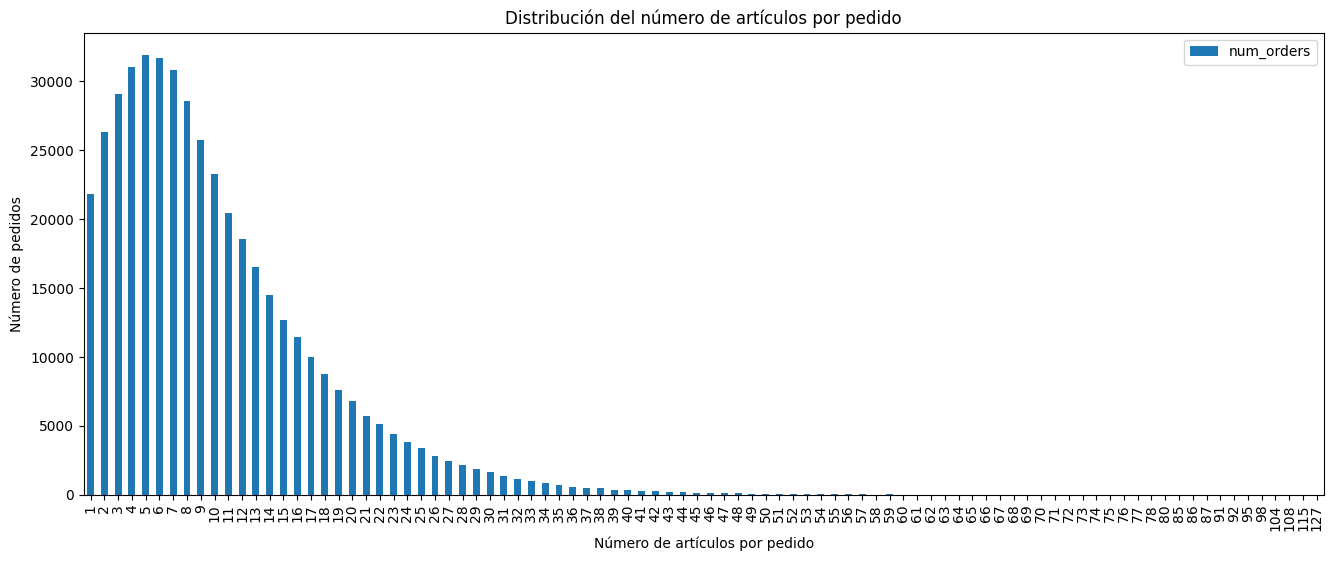

In [48]:
# Graficar
dist_articulos.plot(
    x='num_items',
    y='num_orders',
    kind='bar',
    title='Distribución del número de artículos por pedido',
    xlabel='Número de artículos por pedido',
    ylabel='Número de pedidos',
    figsize=(16,6)
)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


La gente no suele comprar tantos productos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
# Filtrar solo los productos que fueron reordenados
reorders = df_order_products[df_order_products['reordered'] == 1]

In [50]:
# Contar cuántas veces se reordenó cada producto
top_reorders = reorders['product_id'].value_counts().head(20).reset_index()
top_reorders.columns = ['product_id', 'num_reorders']

In [51]:
# Unir con df_products para obtener el nombre
top_reorders = top_reorders.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')


In [52]:
# Mostrar resultados
print(top_reorders[['product_id', 'product_name', 'num_reorders']])

    product_id              product_name  num_reorders
0        24852                    Banana         55763
1        13176    Bag of Organic Bananas         44450
2        21137      Organic Strawberries         28639
3        21903      Organic Baby Spinach         26233
4        47209      Organic Hass Avocado         23629
5        47766           Organic Avocado         18743
6        27845        Organic Whole Milk         16251
7        47626               Large Lemon         15044
8        27966       Organic Raspberries         14748
9        16797              Strawberries         13945
10       26209                     Limes         13327
11       22935      Organic Yellow Onion         11145
12       24964            Organic Garlic         10411
13       45007          Organic Zucchini         10076
14       49683            Cucumber Kirby          9538
15       28204        Organic Fuji Apple          8989
16        8277  Apple Honeycrisp Organic          8836
17       3

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


Insisto a la gente le gustan las bananas JAJAAJ

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
# Contar total de pedidos por producto
total_por_producto = df_order_products.groupby('product_id')['order_id'].count().reset_index()
total_por_producto.columns = ['product_id', 'total_orders']
# Contar cuántas veces se reordenó cada producto
reorders_por_producto = df_order_products.groupby('product_id')['reordered'].sum().reset_index()
reorders_por_producto.columns = ['product_id', 'total_reorders']

In [54]:
# Unir ambos DataFrames
producto_stats = total_por_producto.merge(reorders_por_producto, on='product_id')

# Calcular la proporción de reordenamiento
producto_stats['reorder_ratio'] = producto_stats['total_reorders'] / producto_stats['total_orders']

In [55]:
# Añadir nombres de productos
producto_stats = producto_stats.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar resultados
print(producto_stats[['product_id', 'product_name', 'total_orders', 'total_reorders', 'reorder_ratio']])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       total_orders  total_reorders  reorder_ratio  
0               280             158       0.564286  
1                11          

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
# Unir df_order_products con df_orders para obtener user_id
orders_with_user = df_order_products.merge(
    df_orders[['order_id', 'user_id']],
    on='order_id',
    how='left'
)

# Contar total de productos por cliente
total_por_cliente = orders_with_user.groupby('user_id')['product_id'].count().reset_index()
total_por_cliente.columns = ['user_id', 'total_orders']

# Contar cuántos productos fueron reordenados por cliente
reorders_por_cliente = orders_with_user.groupby('user_id')['reordered'].sum().reset_index()
reorders_por_cliente.columns = ['user_id', 'total_reorders']

# Unir ambos DataFrames
cliente_stats = total_por_cliente.merge(reorders_por_cliente, on='user_id')

# Calcular proporción de productos reordenados
cliente_stats['reorder_ratio'] = cliente_stats['total_reorders'] / cliente_stats['total_orders']

# Mostrar ejemplo
print(cliente_stats.head())


   user_id  total_orders  total_reorders  reorder_ratio
0        2            26               1       0.038462
1        4             2               0       0.000000
2        5            12               8       0.666667
3        6             4               0       0.000000
4        7            14              13       0.928571


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
# Filtrar solo los productos que se agregan primero (add_to_cart_order = 1)
primeros_carrito = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [58]:
# Contar cuántas veces cada producto fue el primero en el carrito
top_primeros = primeros_carrito['product_id'].value_counts().head(20).reset_index()
top_primeros.columns = ['product_id', 'num_first_cart']


In [59]:
# Añadir nombre del producto
top_primeros = top_primeros.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar resultados
print(top_primeros[['product_id', 'product_name', 'num_first_cart']])

    product_id                 product_name  num_first_cart
0        24852                       Banana           15562
1        13176       Bag of Organic Bananas           11026
2        27845           Organic Whole Milk            4363
3        21137         Organic Strawberries            3946
4        47209         Organic Hass Avocado            3390
5        21903         Organic Baby Spinach            3336
6        47766              Organic Avocado            3044
7        19660                 Spring Water            2336
8        16797                 Strawberries            2308
9        27966          Organic Raspberries            2024
10       44632   Sparkling Water Grapefruit            1914
11       49235          Organic Half & Half            1797
12       47626                  Large Lemon            1737
13         196                         Soda            1733
14       38689     Organic Reduced Fat Milk            1397
15       26209                        Li

Podemos observar que a la gente le gusta mas la comida organica y preferentemente las bananas parecen muy atractivas JAJAJa


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

El análisis revela hábitos claros de compra, productos esenciales y patrones de fidelidad de los clientes. Esta información puede ser utilizada para:

Optimizar inventario y promociones según la hora o día.

Identificar productos estratégicos para fidelizar clientes.

Personalizar recomendaciones de productos y mejorar la experiencia del usuario.

Ademas de poder visualizar una relacion de la frecuencia de compra con los dias de la semana visualizando los picos 


## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>
